# Modeling

This notebook will get you started by helping you to load the data, but then it'll be up to you to complete the task! If you need help, email me: tunjiobidokun@gmail.com


## Section 1 - Setup

First, we need to install relevant packages for the project.

In [1]:
# pip install pandas
# print("Pandas installed successfully!")

In [2]:
import pandas as pd
print("Packages imported")

Packages imported


---

## Section 2 - Data loading

We want to load our data  for the 3 datasets provided.

Sales Dataset

In [3]:
path = "sales.csv"

sales_df = pd.read_csv(path)

sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

sales_df.head(2)


,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet


Senseor Stock  Level Dataset

In [4]:
path = "sensor_stock_levels.csv"
stock_df = pd.read_csv(path)
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head(2)

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48


Sensor Storage Temperature Dataset

In [5]:
path = "sensor_storage_temperature.csv"
temp_df = pd.read_csv(path)
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head(2)

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88


Now it's up to you, refer back to the steps in your strategic plan to complete this task. Good luck!

## Section 3:  Data Cleaning

Since we have our datasets loaded, we need to prepare and clean the data before merging the datasets.

### Checking if the datatypes are correct for all the columns.

In [6]:
# Define a function to chech the datatypes of dataset
def check_df_datatypes(df):
    datatypes = df.info()
    return datatypes

In [7]:
check_df_datatypes(sales_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [8]:
check_df_datatypes(stock_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [9]:
check_df_datatypes(temp_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.1+ KB


All columns are fine except the timestamp which is expected to be Datetime datatype. Now, we convert the timestamp column to Datetime

In [10]:
def convert_to_datetime(df, column):
    column = df.timestamp
    df.timestamp = pd.to_datetime(df.timestamp)
    return df




In [11]:
convert_to_datetime(sales_df, 'timestamp')

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [12]:
convert_to_datetime(stock_df, 'timestamp')

stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


In [13]:
convert_to_datetime(temp_df, 'timestamp')

temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.1+ KB


We have successfully converted the timestamp datatype to datetime


## Section 4: Merging the Datasets

Problem Statement: “Can we accurately predict the stock levels of products, based on sales data and sensor data, 
on an hourly basis in order to more intelligently procure products from our suppliers.”

The column "timestamp" is the common column we can use to merge the three datasets provided. Also, our predictive model should work with hourly timing. Therefore, we need to extract the hours from "the timestamp column".

In [14]:
from datetime import datetime as dt

def convert_timestamp_to_hourly(df,column):
    df.timestamp =  df.timestamp.dt.floor('H')
    return df    

In [15]:
sales_df  = convert_timestamp_to_hourly(sales_df, "timestamp")
sales_df.head(1)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet


In [16]:
stock_df  = convert_timestamp_to_hourly(stock_df, "timestamp")
stock_df.head(1)

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75


In [17]:
temp_df  = convert_timestamp_to_hourly(temp_df, "timestamp")
temp_df.head(1)

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96


Now the minutes and seconds of the timestamp have been reduced to zero. We need to aggregate the datasets so we can combine rows with same values.

For the sales data, we want to group the data by timestamp but also by product_id. When we aggregate, we must choose which columns to aggregate by the grouping. For now, let's aggregate quantity.

In [18]:
sales_agg = sales_df.groupby(["timestamp", "product_id"]).agg({'quantity':'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


We do the same for stock dataset

In [19]:
stock_agg = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


For temperature dataset, there is not product id.

In [20]:
temp_agg = temp_df.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


We are ready to merge our datasets. We will use the stock_agg table as our base table, and we will merge our other 2 tables onto this.

In [21]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [22]:
merged_df = merged_df.merge(temp_agg, on=['timestamp'], how = 'left')

merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 423.8+ KB


From the merged dataset, we have missing values for quantity column. We need to fill them with zero.

In [24]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 423.8+ KB


We can combine some more features onto this table too, including category and unit_price.

In [25]:
product_categories = sales_df[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales_df[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [26]:
merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets


In [27]:
merged_df = merged_df.merge(product_price, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 593.2+ KB


## Section 5: Feature Engineering

We have our cleaned and merged data. Now we must transform this data so that the columns are in a suitable format for a machine learning model. In other terms, every column must be numeric. There are some models that will accept categorical features, but for this exercise we will use a model that requires numeric features.

Let's first engineer the timestamp column. In it's current form, it is not very useful for a machine learning model. Since it's a datetime datatype, we can explode this column into day of week, day of month and hour to name a few.

In [29]:
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9


The next column that we can engineer is the category column. In its current form it is categorical. We can convert it into numeric by creating dummy variables from this categorical column.

A dummy variable is a binary flag column (1's and 0's) that indicates whether a row fits a particular value of that column. For example, we can create a dummy column called category_pets, which will contain a 1 if that row indicates a product which was included within this category and a 0 if not.

In [30]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,True
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,9,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,9,False,False,...,False,False,False,False,True,False,False,False,False,False


In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      10845 non-null  object 
 1   estimated_stock_pct             10845 non-null  float64
 2   quantity                        10845 non-null  float64
 3   temperature                     10845 non-null  float64
 4   unit_price                      10845 non-null  float64
 5   timestamp_day_of_month          10845 non-null  int32  
 6   timestamp_day_of_week           10845 non-null  int32  
 7   timestamp_hour                  10845 non-null  int32  
 8   category_baby products          10845 non-null  bool   
 9   category_baked goods            10845 non-null  bool   
 10  category_baking                 10845 non-null  bool   
 11  category_beverages              10845 non-null  bool   
 12  category_canned foods           

Looking at the latest table, we only have 1 remaining column which is not numeric. This is the product_id.

Since each row represents a unique combination of product_id and timestamp by hour, and the product_id is simply an ID column, it will add no value by including it in the predictive model. Hence, we shall remove it from the modeling process.

In [32]:
merged_df.drop(columns = ["product_id"], inplace = True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   estimated_stock_pct             10845 non-null  float64
 1   quantity                        10845 non-null  float64
 2   temperature                     10845 non-null  float64
 3   unit_price                      10845 non-null  float64
 4   timestamp_day_of_month          10845 non-null  int32  
 5   timestamp_day_of_week           10845 non-null  int32  
 6   timestamp_hour                  10845 non-null  int32  
 7   category_baby products          10845 non-null  bool   
 8   category_baked goods            10845 non-null  bool   
 9   category_baking                 10845 non-null  bool   
 10  category_beverages              10845 non-null  bool   
 11  category_canned foods           10845 non-null  bool   
 12  category_cheese                 

In [33]:
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.14,3.0,-0.02885,1.49,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.67,0.0,-0.02885,14.19,1,1,9,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.82,0.0,-0.02885,20.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.05,0.0,-0.02885,8.19,1,1,9,False,False,False,...,False,False,False,False,True,False,False,False,False,False


## Section 6: Modeling

Now, it's time to initiate the training of a machine learning model. We will opt for a supervised machine learning model, with the target variable being "estimated_stock_pct," as the problem statement primarily revolves around forecasting product stock levels on an hourly basis.

As we proceed with the training of the machine learning model, we will incorporate cross-validation, a technique in which a portion of the dataset is reserved for testing, allowing us to assess how effectively the trained model predicts the target variable.

To ensure the robustness of the trained model, it's essential to subject it to multiple tests on random data samples, rather than just a single evaluation. Consequently, we will employ a K-fold strategy to train the machine learning model on K (where K is an integer to be determined) random data samples.

To kick things off, let's establish our target variable, denoted as "y," and our independent variables, referred to as "X."

In [34]:
y = merged_df["estimated_stock_pct"]
features = [col for col in merged_df.columns if col != 'estimated_stock_pct']
X = merged_df[features]

print(X.shape)
print(y.shape)

(10845, 28)
(10845,)


This shows that we have 28 predictor variables that we will train our machine learning model on and 10845 rows of data.

Now let's define how many folds we want to complete during training, and how much of the dataset to assign to training, leaving the rest for test.

Typically, we should leave at least 20-30% of the data for testing.

In [35]:
K = 10
split = 0.75

For the model, we will use RandomForestRegressor, an instance of Random Forest. Regression is used because we are predicting continuous numeric variable ("Estimated Stock Product").

In [36]:
# !pip install scikit-learn

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

And now let's create a loop to train K models with a 75/25% random split of the data each time between training and test samples

In [37]:
accuracy = []

for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")


Fold 1: MAE = 0.236
Fold 2: MAE = 0.236
Fold 3: MAE = 0.236
Fold 4: MAE = 0.236
Fold 5: MAE = 0.237
Fold 6: MAE = 0.236
Fold 7: MAE = 0.237
Fold 8: MAE = 0.236
Fold 9: MAE = 0.236
Fold 10: MAE = 0.236
Average MAE: 0.24


Please note that the results from this training loop may vary slightly for you if you've preprocessed the data differently or used different parameters.

Nonetheless, this observation is quite intriguing. It's evident that the mean absolute error (MAE) remains remarkably consistent each time. This uniformity is a positive indicator, indicating that the model's performance remains stable across various random data samples, demonstrating its robustness.

We opted for MAE as a performance metric because it gauges how accurately the machine learning model predicts the precise value of "estimated_stock_pct."

However, it's worth noting that while the model exhibits robustness, the MAE value isn't particularly favorable. Given that the average value of the target variable hovers around 0.51, implying an accuracy of approximately 50%, we ideally seek a lower MAE. This underscores the iterative nature of machine learning. At this juncture, with only limited data samples, it's prudent to relay these findings to the business and recommend further data engineering or the incorporation of additional datasets.

In closing, we can leverage the trained model to discern which features carried significance when predicting the target variable. To visualize these results, we'll make use of matplotlib and numpy.

In [38]:
# !pip install matplotlib
# !pip install numpy

In [39]:
import matplotlib.pyplot as plt
import numpy as np

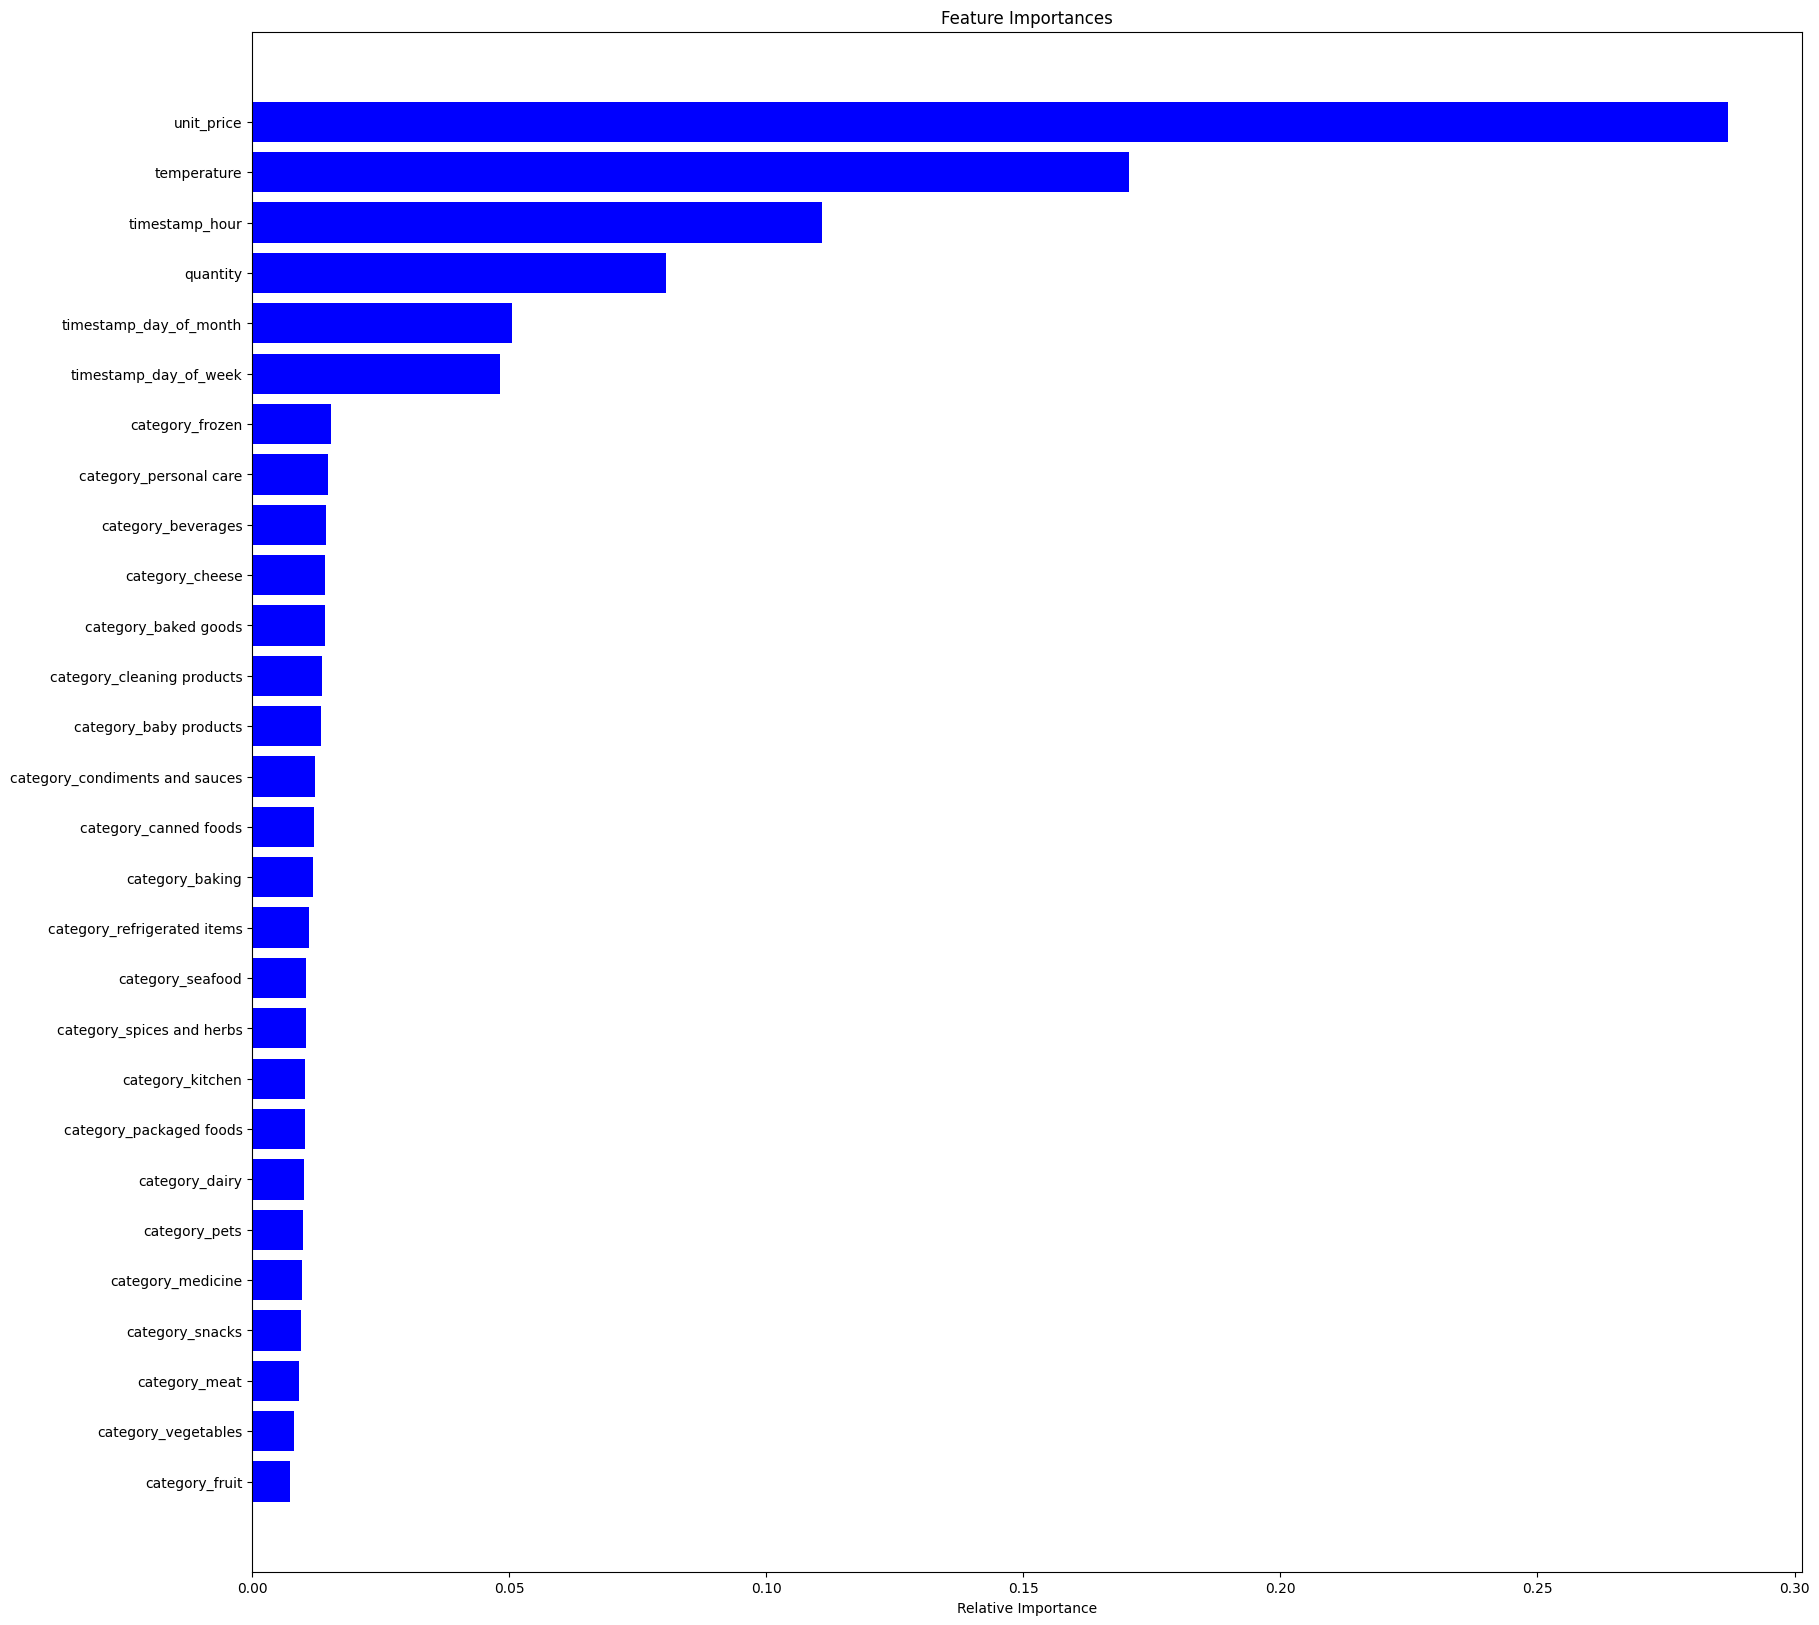

In [45]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(20, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], )
plt.xlabel('Relative Importance')
plt.savefig("feature_importance.png")
plt.show()


This feature importance visualisation tells us:

The product categories were not that important
The unit price and temperature were important in predicting stock
The hour of day was also important for predicting stock
With these insights, we can now report this back to the business

In [46]:
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.14,3.0,-0.02885,1.49,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.67,0.0,-0.02885,14.19,1,1,9,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.82,0.0,-0.02885,20.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.05,0.0,-0.02885,8.19,1,1,9,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [47]:
merged_df.estimated_stock_pct.mean()

0.5051298447825419